In [1]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import StandardScaler

### Выгрузим данные

In [2]:
boston_dataset = load_boston()
print('boston_dataset_keys = ', boston_dataset.keys())

boston_dataset_keys =  dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


### Посмотрим на описание данных

In [3]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### Сформируем датафрейм

In [4]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston['MEDV'] = boston_dataset.target
print("boston.shape = ", boston.shape)
boston.head()

boston.shape =  (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Проверим датасет на предмет пропущенных значений

In [5]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

### Нарисуем матрицу корреляций

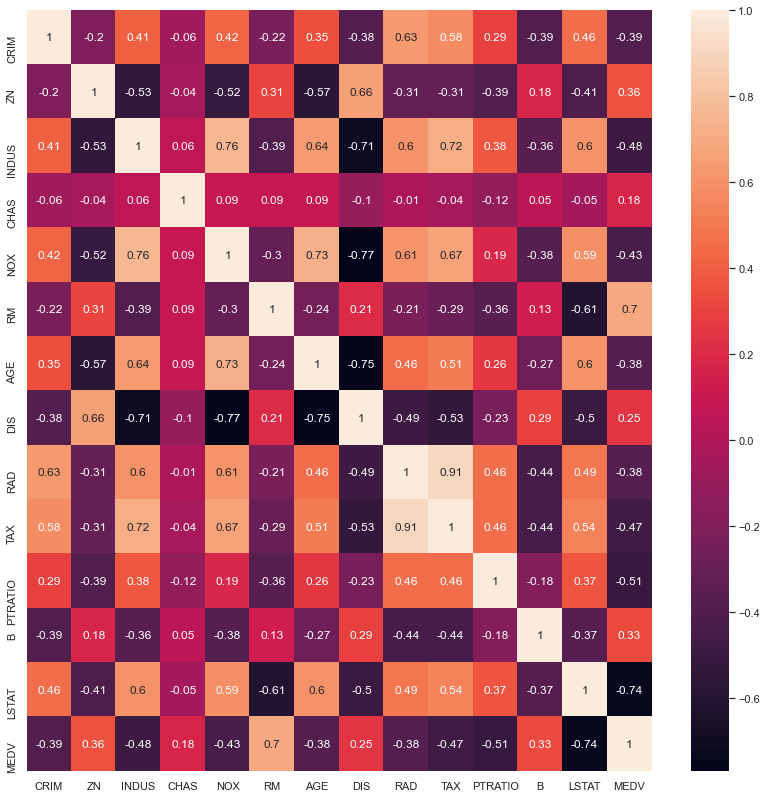

In [6]:
correlation_matrix = boston.corr().round(2)
# fig, ax = plt.subplots(figsize=(16,10))      
sns.set(rc={'figure.figsize':(14,14)})
sns.heatmap(data=correlation_matrix, annot=True)

### Посмотрим на распределение целевой метки

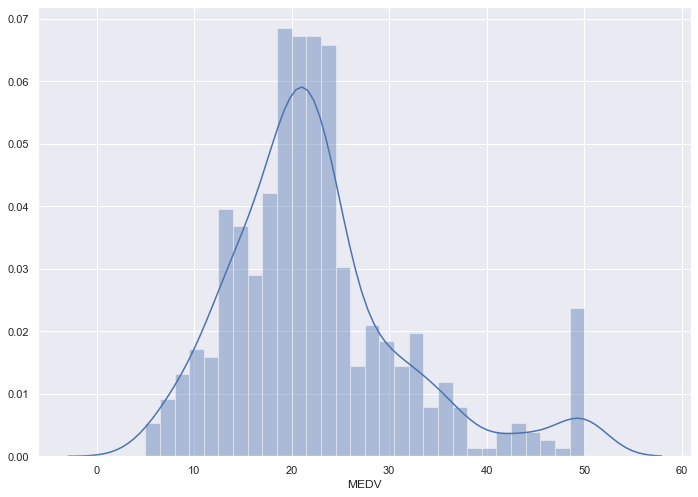

In [7]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston['MEDV'], bins=30)
plt.show()

### Отрисуем зависимости между целевой меткой и наиболее коррелирующими признаками

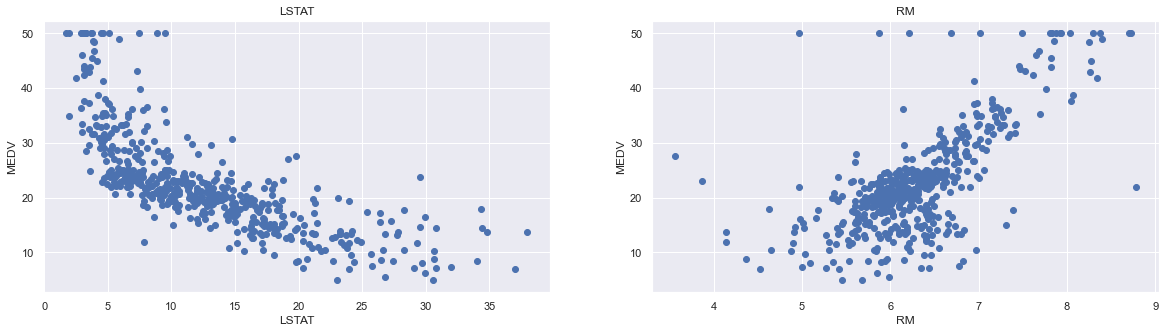

In [8]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

### Разделим данные

In [9]:
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
Y = boston['MEDV']

### Разделим данные на обучающую и тестовую выборки

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)

### Обучим модель линейной регрессии

In [11]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Посмотрим на результаты

In [12]:
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))

print("The model performance for training set")
print('RMSE is {}'.format(rmse))

y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

print("The model performance for testing set")
print('RMSE is {}'.format(rmse))


The model performance for training set
RMSE is 5.6371293350711955
The model performance for testing set
RMSE is 5.137400784702911


### Рассмотрим распределение ошибки

In [13]:
errors = (Y_test-y_test_predict).to_numpy()

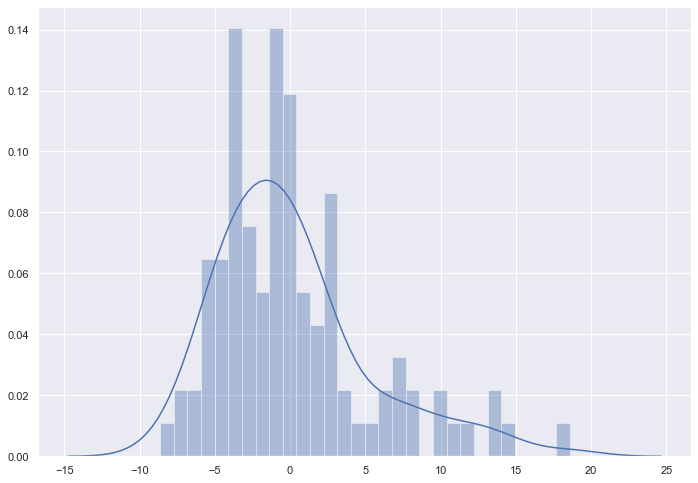

In [14]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(errors, bins=30)
plt.show()

# Задание

1) На датасете https://www.kaggle.com/mohansacharya/graduate-admissions построить модель линейной регрессии.
    Попытаться получить хороший результат на отложенной выборке, не переобучиться, поотбирать фичи, попробовать модели с регуляризацией при необходимости